# Universal Regression Model

### Importing libraries and define functions

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import os
import sys

In [2]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

In [3]:
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [4]:
from pycaret.regression import *

In [5]:
import functions as f

### Loading the train data into the data frame.

In [6]:
data_train_df = pd.read_csv("output/datasets/universal/data_regression_train_df.csv", encoding="utf-8")

In [7]:
data_train_df.dtypes

NP_type                object
Coating                object
core_size_nm          float64
hydro_size_nm         float64
Surf_charge_mV        float64
Surface_area_m2_g     float64
shape                  object
Dose_microg_mL        float64
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
Viability             float64
dtype: object

In [8]:
data_train_df.shape

(9052, 20)

In [9]:
data_train_df.head()

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,Viability
0,CdSe,None,4.60,NaN,NaN,NaN,NaN,7.17,1.0,MC3T3-E1,Mouse,Bone,Preosteoblast,neonate,Normal,NaN,Others,NaN,quantum_dots,86.00
1,CdSe,None,5.20,NaN,NaN,NaN,NaN,0.00,24.0,Neuro­2a,Mouse,Brain,Neural,Adult,cancer,NaN,LDH,LDHrelease,quantum_dots,10.83
2,QDs,SGF,6.00,NaN,NaN,NaN,NaN,0.84,24.0,Caco_2,Human,Colon,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,quantum_dots,70.73
3,Cu2O,None,88.50,NaN,NaN,NaN,NaN,0.00,8.0,THP_1,Human,Blood,monocyte,neonate,cancer,male,NR,toluylene red,meta_oxide,113.02
4,Ag,None,29.57,NaN,-24.58,NaN,Sphere,25.00,48.0,HaCat,Human,Skin,Keratinocyte,Adult,Normal,male,Alamar_Blue,AlamarBlue,other,61.90


In [10]:
#data_train_df_clean = data_train_df.dropna(thresh=data_train_df.shape[1]-3, axis=0)
#print(data_train_df_clean.shape)

### Loading the test data into the data frame.

In [11]:
data_test_df = pd.read_csv("output/datasets/universal/data_regression_test_df.csv", encoding="utf-8")

In [12]:
data_test_df.dtypes

NP_type                object
Coating                object
core_size_nm          float64
hydro_size_nm         float64
Surf_charge_mV        float64
Surface_area_m2_g     float64
shape                  object
Dose_microg_mL        float64
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
Viability             float64
dtype: object

In [13]:
data_test_df.shape

(2263, 20)

In [14]:
data_test_df.head()

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,Viability
0,CdTe,Heparin,2.80,NaN,NaN,NaN,NaN,39.44,5.0,HEK293,Human,Kidney,Epithelial,fetus,cancer,female,MTT,TetrazoliumSalt,quantum_dots,66.40
1,ZnO,None,141.00,404.0,NaN,NaN,Sphere,50.00,9.0,SIRC,Rabbit,Cornea,Fibroblast,Adult,Normal,NaN,MTT,TetrazoliumSalt,meta_oxide,49.92
2,Polystyrene,COOH,168.35,NaN,-31.5,NaN,Sphere,50.00,24.0,Macrophages,Human,Lung,Macrophage,Adult,Normal,NaN,MTT,TetrazoliumSalt,other,97.05
3,TiO2,None,11.69,NaN,NaN,NaN,NaN,0.29,24.0,LLC­PK1,Pig,Kidney,Epithelial,neonate,Normal,male,WST-1,TetrazoliumSalt,meta_oxide,30.94
4,CeO2,None,25.00,305.0,-16.5,NaN,Cubic,50.00,24.0,MCF7,Human,Breast,Epithelial,Adult,cancer,female,MTT,TetrazoliumSalt,meta_oxide,104.01


In [15]:
#data_test_df_clean = data_test_df.dropna(thresh=data_test_df.shape[1]-3, axis=0)
#print(data_test_df_clean.shape)

### Use the best scenario identified in step 01

In [16]:
sc_ignore_features = ['nanomaterial_group', 'Coating', 'Cell_name']
sc_bin_numeric_features = None
sc_high_cardinality_features = None

sc_imputation_type = 'iterative'
sc_numeric_imputation = 'mean'

sc_normalize = True
sc_remove_outliers = True

### The Universal Regression Model: Data Preprcoessing

In [17]:
stup = setup(data = data_train_df, target = 'Viability', 
              
        test_data = data_test_df,

        imputation_type = sc_imputation_type, 
        numeric_imputation = sc_numeric_imputation, #default: mean

        categorical_imputation = "constant", #default: constant
        iterative_imputation_iters = 5, #default: 5
        numeric_iterative_imputer = "lightgbm",
        categorical_iterative_imputer = "lightgbm",

        ignore_features = sc_ignore_features,
        bin_numeric_features = sc_bin_numeric_features,
        high_cardinality_features = sc_high_cardinality_features,

        high_cardinality_method = "frequency", #default: frequency
        handle_unknown_categorical = True, #default
        unknown_categorical_method = "least_frequent", #default

        normalize = sc_normalize, #default: False
        remove_outliers= sc_remove_outliers, #default: False

        outliers_threshold = 0.05, #default

        transformation= False, #default
        transformation_method = 'yeo-johnson', #default
        transform_target = False, 
        combine_rare_levels = False,
        rare_level_threshold = 0.1, #default: 0.1

        remove_multicollinearity = False, #default 
        multicollinearity_threshold = 0.9, #default

        ignore_low_variance = True, 

        feature_interaction = False, 
        feature_ratio = False,
        polynomial_features = False, 
        trigonometry_features = False,

        # don't change the following
        session_id = 123,
        use_gpu=False,
        log_experiment = False,
        silent=True,
        experiment_name = 'universal')

set_config('seed', 123)

,Description,Value
0,session_id,123
1,Target,Viability
2,Original Data,"(9052, 20)"
3,Missing Values,True
4,Numeric Features,6
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8599, 185)"


In [18]:
print(get_config(variable="X_train").shape)
print(get_config(variable="y_train").shape)

(8599, 185)
(8599,)


In [19]:
print(get_config(variable="X").shape)
print(get_config(variable="y").shape)

(9052, 185)
(9052,)


In [20]:
set_config('X_train', get_config(variable="X").copy()) 
set_config('y_train', get_config(variable="y").copy()) 

In [21]:
print(get_config(variable="X_train").shape)
print(get_config(variable="y_train").shape)

(9052, 185)
(9052,)


In [22]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(2263, 185)
(2263,)


In [23]:
#load_config('output/models/universal_regression_config.cfg')

In [24]:
data_train_transformed_df = get_config(variable="X").copy()
data_train_transformed_df['Viability'] = get_config(variable="y").copy()

In [25]:
data_test_transformed_df = get_config(variable="X_test").copy()
data_test_transformed_df['Viability'] = get_config(variable="y_test").copy()

In [26]:
data_train_transformed_df.to_csv('output/datasets/universal/transformed/data_regression_train_transformed_df.csv', encoding='utf-8', index=False)
data_test_transformed_df.to_csv('output/datasets/universal/transformed/data_regression_test_transformed_df.csv', encoding='utf-8', index=False)

### The Universal Regression Model Comparison

In [27]:
top_model = compare_models(exclude=['lar','llar'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,12.8790,384.7902,19.5876,0.6190,0.5343,1.6508,1.7780
et,Extra Trees Regressor,12.2136,397.3608,19.9006,0.6064,0.5349,1.4976,1.8950
xgboost,Extreme Gradient Boosting,14.1047,405.3772,20.1132,0.5994,0.5663,1.7879,1.0580
catboost,CatBoost Regressor,14.6664,421.3499,20.5102,0.5838,0.5877,1.9194,4.9670
lightgbm,Light Gradient Boosting Machine,15.4496,459.5230,21.4206,0.5465,0.6105,2.1049,0.0620
dt,Decision Tree Regressor,14.5771,557.7160,23.5733,0.4471,0.6116,1.5619,0.0410
knn,K Neighbors Regressor,16.7384,568.6326,23.8270,0.4381,0.6318,1.9375,0.1670
gbr,Gradient Boosting Regressor,20.0179,660.5070,25.6854,0.3487,0.7408,3.0958,0.3550
ridge,Ridge Regression,21.7050,774.5496,27.8209,0.2358,0.7847,3.9126,0.0180
br,Bayesian Ridge,21.7569,775.0891,27.8309,0.2352,0.7883,3.9750,0.1420


In [28]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv("output/models_results/universal/" + "regression_model_comparison_results.tsv", 
                index=False, encoding="utf-8", sep="\t")

In [29]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(2263, 185)
(2263,)


In [30]:
print(results_df.iloc[0,0])

rf


### 10-fold cross-validation of the best performing model

In [31]:
model = create_model(results_df.iloc[0,0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.1002,349.6131,18.6979,0.6664,0.4662,0.5706
1,12.5734,360.7735,18.9940,0.6226,0.5528,7.6574
2,13.0473,372.0193,19.2878,0.6250,0.5258,0.6344
3,13.0288,453.8825,21.3045,0.5898,0.4928,0.6121
4,12.6831,355.0909,18.8439,0.6768,0.5828,0.6983
5,13.1300,394.8478,19.8708,0.5975,0.5411,1.2252
6,12.2480,326.7435,18.0760,0.6675,0.5476,1.0552
7,13.5025,399.9467,19.9987,0.6164,0.5750,1.6763
8,13.3585,463.6284,21.5320,0.4910,0.5073,1.5210


In [32]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv("output/models_results/universal/" + "regression_model_cross_validation_results.tsv", 
                index=False, encoding="utf-8", sep="\t")

In [33]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(2263, 185)
(2263,)


### Finalize the model

In [34]:
final_model = finalize_model(model)

In [35]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(2263, 185)
(2263,)


### Test the model on the test set

In [36]:
pred_test_set = predict_model(final_model, data=data_test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,12.9462,403.1352,20.0782,0.6292,0.5419,1.0943


In [37]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv("output/models_results/universal/" + "regression_model_test_set_validation_results.tsv", 
                index=False, encoding="utf-8", sep="\t")

In [38]:
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,12.9462,403.1352,20.0782,0.6292,0.5419,1.0943


,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,Dose_microg_mL,Duration_h,NP_type_Ag,NP_type_Al2O3,NP_type_Alginate,NP_type_Au,...,Test_indicator_Dead-Cell-Protease,Test_indicator_LDHrelease,Test_indicator_TetrazoliumSalt,Test_indicator_Trypan_Blue,Test_indicator_fluorescent,Test_indicator_luciferase,Test_indicator_propidium_iodide,Test_indicator_toluylene red,Viability,Label
0,-0.589116,-0.969192,0.918720,0.276223,-0.092128,-0.850029,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,66.400002,50.503767
1,0.840442,0.596000,0.103000,-0.863926,-0.072082,-0.733833,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,49.919998,46.345100
2,1.123353,0.182393,-0.515651,-1.374706,-0.072082,-0.298097,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,97.050003,94.669099
3,-0.497157,0.310902,0.062492,0.343930,-0.166445,-0.298097,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.940001,75.811367
4,-0.359477,0.177460,-0.062304,-0.672694,-0.072082,-0.298097,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,104.010002,100.509781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,-0.335685,-0.426843,-0.639566,0.763747,-0.072082,-0.298097,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,84.250000,79.725800
2259,-0.581875,-0.869440,0.576234,0.162493,-0.166236,-0.298097,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,43.900002,74.505054
2260,-0.359477,-0.146803,0.112990,-0.660760,-0.166996,-0.820980,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.000000,100.957584
2261,-0.100874,-0.700967,-0.168085,-0.846708,-0.143267,-0.298097,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,96.680000,95.063481


### Inspect model plots

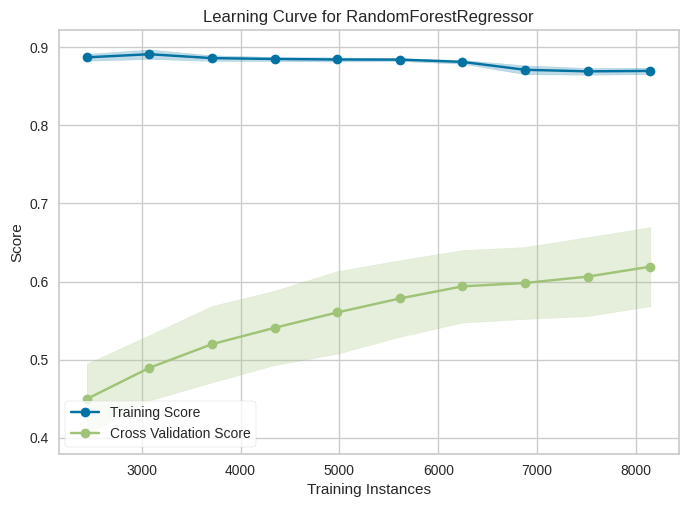

In [39]:
plot_model(final_model, plot = 'learning')

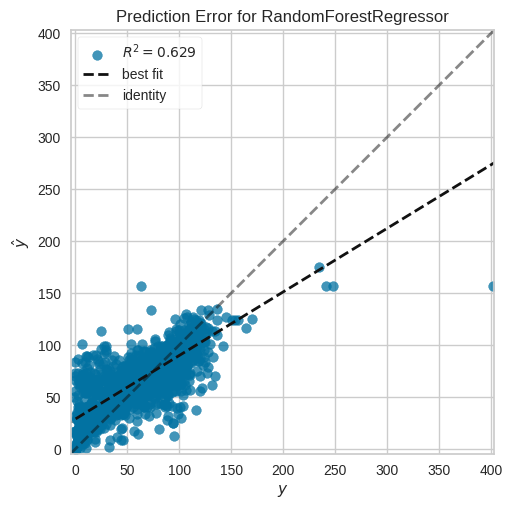

In [40]:
plot_model(final_model, plot = 'error')

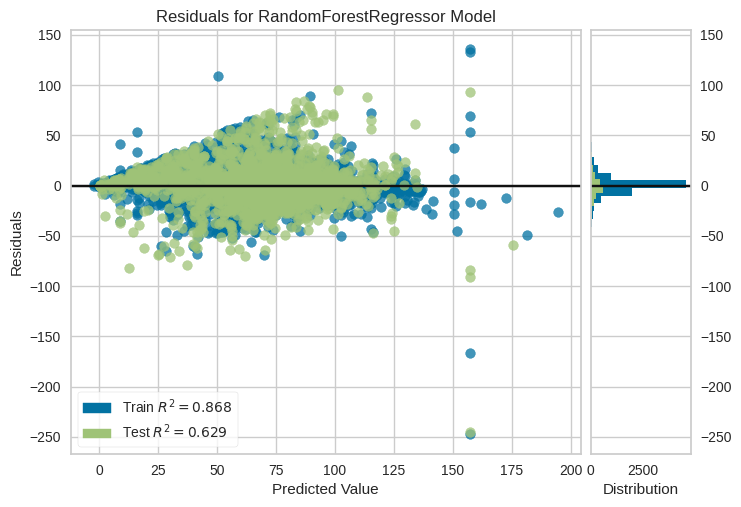

In [41]:
plot_model(final_model, plot = 'residuals')

### Feature importance plot

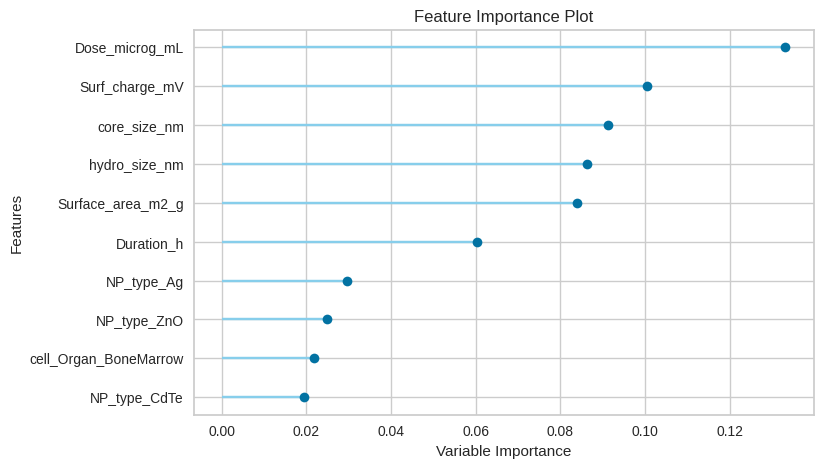

In [42]:
plot_model(final_model, plot = 'feature')

### Save the model to file

In [43]:
save_config('output/models/universal_regression_config.cfg')

In [44]:
save_model(final_model, 'output/models/universal_regression_model.mdl')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['nanomaterial_group',
                                                        'Coating', 'Cell_name'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Viability',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=None,
                                        max_features='auto', max_leaf_nodes=None,
                                        max_samples=Non